In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [228]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [229]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [230]:
le=LabelEncoder()
for col in df.columns:
  if (df[col].dtypes=="O"):
    df[col]=le.fit_transform(df[col])

In [231]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [232]:
X=df[["EstimatedSalary"]]

In [233]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

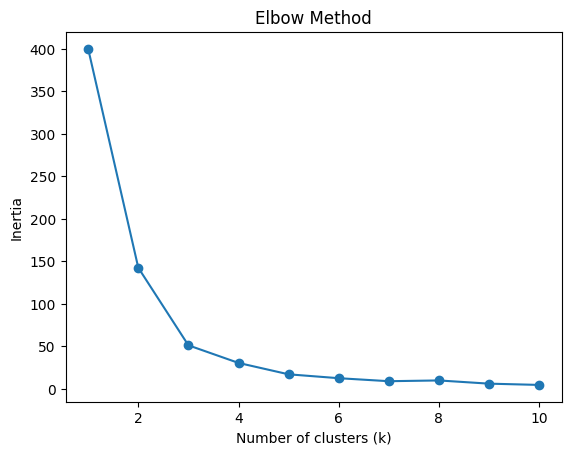

In [234]:
inertia = []
K = range(1,11)

for k in K:
  model=KMeans(n_clusters=k,random_state=42)
  model.fit(X_scaled)
  inertia.append(model.inertia_)

plt.plot(K,inertia,marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [235]:
model=KMeans(n_clusters=4,random_state=42)
df["Cluster"]=model.fit_predict(X_scaled)

In [236]:
df[["EstimatedSalary","Cluster"]]

,EstimatedSalary,Cluster
0,19000,1
1,20000,1
2,43000,1
3,57000,0
4,76000,2
...,...,...
395,41000,1
396,23000,1
397,20000,1
398,33000,1


In [237]:
print(silhouette_score(X_scaled,model.labels_))

0.5564094334091159


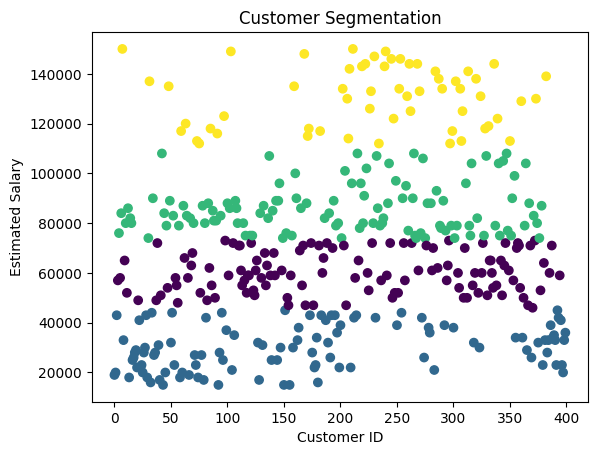

In [240]:
plt.scatter(df.index,df["EstimatedSalary"],c=df["Cluster"])
plt.xlabel("Customer ID")
plt.ylabel("Estimated Salary")
plt.title("Customer Segmentation")
plt.show()